# ***Christopher Kennedy***
# ***Student ID Number: 109306056***
# ***Other Group Members: Owen O'Reily, Evan Spector, and Aiden Oh***
# ***AMS 595***
# ***Group Project Code***

*IMPORTANT: Ensure the Excel File "RawData.xlsx" is loaded into the session before executing any code cells*

# Models that worked and were expanded to include plots: Gradient Boosting Regression and XGBoost

Gradient Boosting Regressor

Cumulative Error: 1022481662.7734011
Average Error: 2615042.61578875
Average Percent Error: 47.919318683150095
R-squared Score: 0.7650606159625036
Prediction for Bronny: 1850260.872999136
Absolute Difference for Bronny: 693260.8729991361
Percent Error for Bronny: 59.91883085558653%


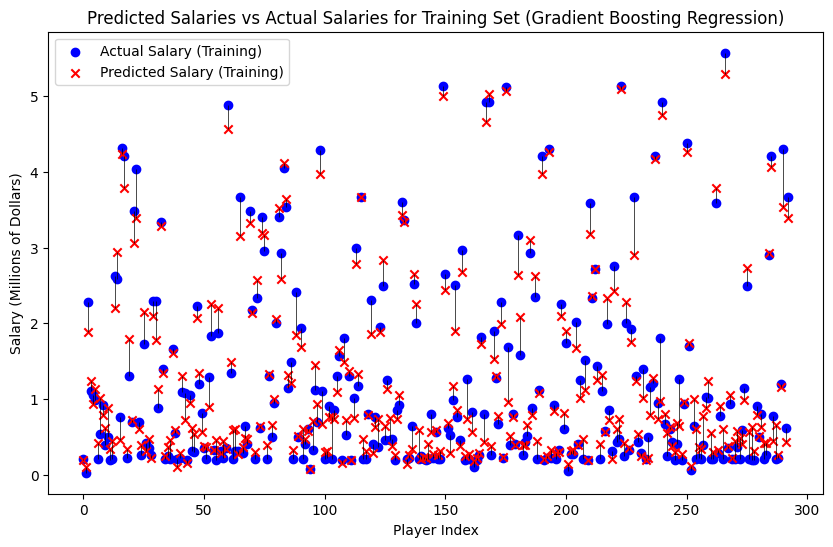

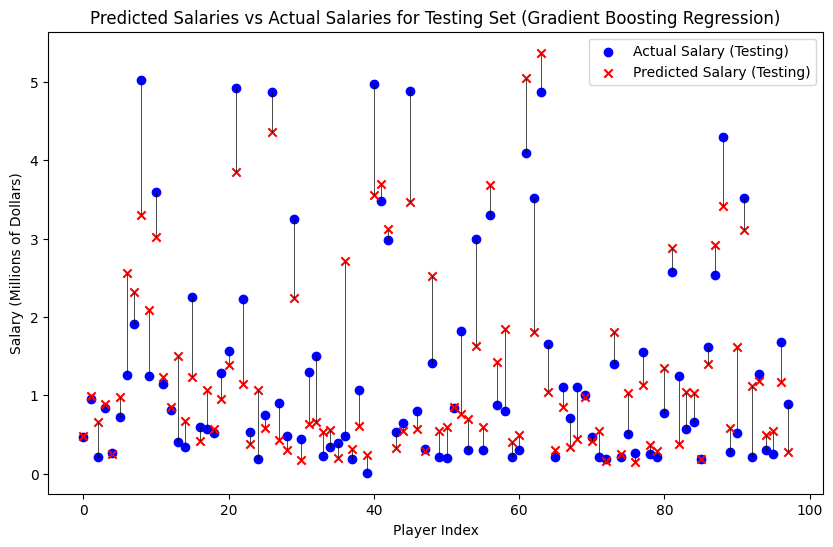

In [ ]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
df_train = pd.read_excel('RawData.xlsx', sheet_name='Training_Data')
df_test = pd.read_excel('RawData.xlsx', sheet_name='Test_Data')
df_full = pd.read_excel('RawData.xlsx', sheet_name='Full_Data')

# Define source columns for training set
train_source_columns = df_train[['Minutes',
                                 'FG%',
                                 '3P%',
                                 'FT%',
                                 'REB',
                                 'AST',
                                 'STL',
                                 'BLK',
                                 'PF',
                                 'PPG',
                                 'Age']]
train_source = train_source_columns.values

# Define target column for training set
train_target_columns = df_train[['2024-25 Salary']]
train_target = train_target_columns.values.ravel()  # Reshape to 1D array

# Define source columns for test set
test_source_columns = df_test[['Minutes',
                               'FG%',
                               '3P%',
                               'FT%',
                               'REB',
                               'AST',
                               'STL',
                               'BLK',
                               'PF',
                               'PPG',
                               'Age']]
test_source = test_source_columns.values

# Define target column for test
test_target_columns = df_test[['2024-25 Salary']]
test_target = test_target_columns.values.ravel()  # Reshape to 1D array

# Define source columns for full dataset
full_source_columns = df_full[['Minutes',
                               'FG%',
                               '3P%',
                               'FT%',
                               'REB',
                               'AST',
                               'STL',
                               'BLK',
                               'PF',
                               'PPG',
                               'Age']]
full_source = full_source_columns.values

# Define target columns for full dataset
full_target_columns = df_full[['2024-25 Salary']]
full_target = full_target_columns.values.ravel()  # Reshape to 1D array

# Create and train the Gradient Boosting Regression model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(train_source, train_target)

# Predict on the full dataset
full_predictions = model.predict(full_source)

# Calculate Cumulative Error
cumulative_error = sum(abs(full_predictions - full_target))

# Calculate Average Error
average_error = cumulative_error / len(full_target)

# Calculate Average Percent Error
average_percent_error = sum(abs((full_predictions - full_target) / full_target) * 100) / len(full_target)

# Calculate R-squared score for the test set
r2 = r2_score(test_target, model.predict(test_source))

# Define Bronny James's stat line
bronny = [2.6, 16.7, 0.0, 100, 0.2, 0.3, 0.2, 0.0, 0.3, 6, 20]

# Reshape Bronny's data to match the model input shape (1, n_features)
bronny = [bronny]  # Turn it into a 2D array (1 sample, multiple features)

# Predict the salary for Bronny
bronny_prediction = model.predict(bronny)[0]

# Define the ground truth salary for Bronny
bronny_ground_truth = 1157000

# Calculate the absolute difference and percent error for Bronny
bronny_absolute_error = abs(bronny_prediction - bronny_ground_truth)
bronny_percent_error = (bronny_absolute_error / bronny_ground_truth) * 100

# Print the results
print(f"Cumulative Error: {cumulative_error}")
print(f"Average Error: {average_error}")
print(f"Average Percent Error: {average_percent_error}")
print(f"R-squared Score: {r2}")
print(f"Prediction for Bronny: {bronny_prediction}")
print(f"Absolute Difference for Bronny: {bronny_absolute_error}")
print(f"Percent Error for Bronny: {bronny_percent_error}%")

# Plotting the predicted vs. actual salaries for Training Set
plt.figure(figsize=(10, 6))

# Training Set
train_predictions = model.predict(train_source)

for i in range(len(train_target)):
    plt.vlines(i, train_target[i] / 1e7, train_predictions[i] / 1e7, color='black', linewidth=0.5)

# Scatter plot for actual and predicted salaries
plt.scatter(range(len(train_target)), train_target / 1e7, label='Actual Salary (Training)', marker='o', color='b')
plt.scatter(range(len(train_predictions)), train_predictions / 1e7, label='Predicted Salary (Training)', marker='x', color='r')

# Labeling the graph
plt.title('Predicted Salaries vs Actual Salaries for Training Set (Gradient Boosting Regression)')
plt.xlabel('Player Index')
plt.ylabel('Salary (Millions of Dollars)')
plt.legend()

# Show the plot for the training set
plt.show()

# Plotting the predicted vs. actual salaries for Testing Set
plt.figure(figsize=(10, 6))

# Testing Set
test_predictions = model.predict(test_source)

for i in range(len(test_target)):
    plt.vlines(i, test_target[i] / 1e7, test_predictions[i] / 1e7, color='black', linewidth=0.5)

# Scatter plot for actual and predicted salaries
plt.scatter(range(len(test_target)), test_target / 1e7, label='Actual Salary (Testing)', marker='o', color='b')
plt.scatter(range(len(test_predictions)), test_predictions / 1e7, label='Predicted Salary (Testing)', marker='x', color='r')

# Labeling the graph
plt.title('Predicted Salaries vs Actual Salaries for Testing Set (Gradient Boosting Regression)')
plt.xlabel('Player Index')
plt.ylabel('Salary (Millions of Dollars)')
plt.legend()

# Show the plot for the testing set
plt.show()

XGBoost

Cumulative Error: 590371489.46875
Average Error: 1509901.507592711
Average Percent Error: 28.81486559190492
R-squared Score: 0.7043692469596863
Prediction for Bronny: 1177551.875
Absolute Difference for Bronny: 20551.875
Percent Error for Bronny: 1.7763072601555747%


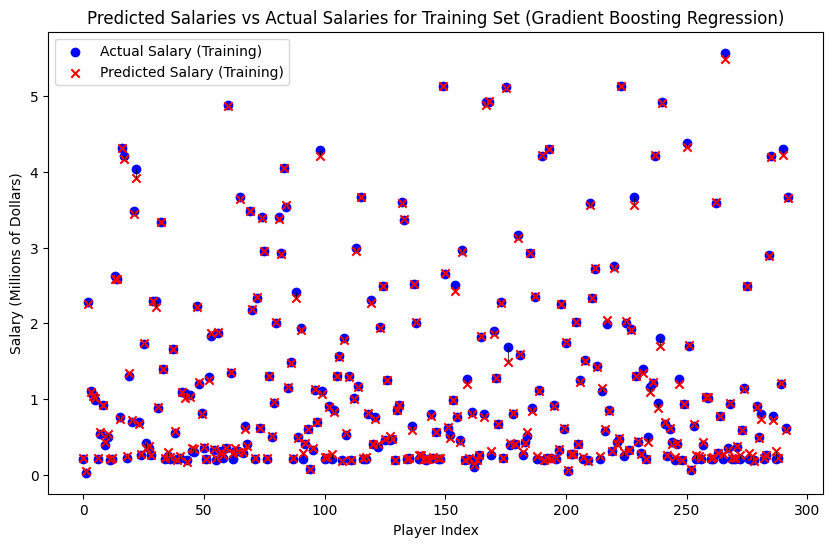

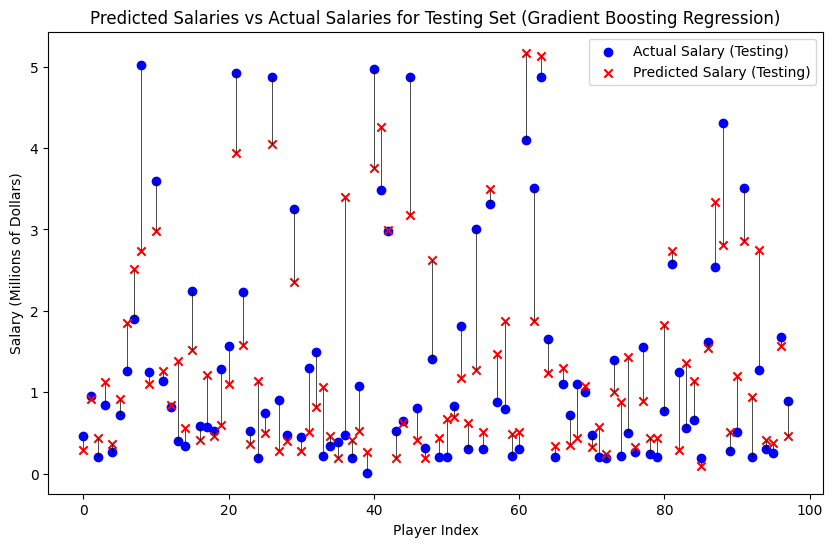

In [1]:
# Import necessary libraries
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
df_train = pd.read_excel('RawData.xlsx', sheet_name='Training_Data')
df_test = pd.read_excel('RawData.xlsx', sheet_name='Test_Data')
df_full = pd.read_excel('RawData.xlsx', sheet_name='Full_Data')

# Define source columns for training set
train_source_columns = df_train[['Minutes',
                                 'FG%',
                                 '3P%',
                                 'FT%',
                                 'REB',
                                 'AST',
                                 'STL',
                                 'BLK',
                                 'PF',
                                 'PPG',
                                 'Age']]
train_source = train_source_columns.values

# Define target column for training set
train_target_columns = df_train[['2024-25 Salary']]
train_target = train_target_columns.values.ravel()  # Reshape to 1D array

# Define source columns for test set
test_source_columns = df_test[['Minutes',
                               'FG%',
                               '3P%',
                               'FT%',
                               'REB',
                               'AST',
                               'STL',
                               'BLK',
                               'PF',
                               'PPG',
                               'Age']]
test_source = test_source_columns.values

# Define target column for test set
test_target_columns = df_test[['2024-25 Salary']]
test_target = test_target_columns.values.ravel()  # Reshape to 1D array

# Define source columns for full dataset
full_source_columns = df_full[['Minutes',
                               'FG%',
                               '3P%',
                               'FT%',
                               'REB',
                               'AST',
                               'STL',
                               'BLK',
                               'PF',
                               'PPG',
                               'Age']]
full_source = full_source_columns.values

# Define target column for full dataset
full_target_columns = df_full[['2024-25 Salary']]
full_target = full_target_columns.values.ravel()  # Reshape to 1D array

# Create and train the XGBoost model
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(train_source, train_target)

# Predict on the full dataset
full_predictions = model.predict(full_source)

# Calculate Cumulative Error
cumulative_error = sum(abs(full_predictions - full_target))

# Calculate Average Error
average_error = cumulative_error / len(full_target)

# Calculate Average Percent Error
average_percent_error = sum(abs((full_predictions - full_target) / full_target) * 100) / len(full_target)

# Calculate R-squared score for the test set
r2 = r2_score(test_target, model.predict(test_source))

# Define Bronny James's stat line
bronny = [2.6, 16.7, 0.0, 100, 0.2, 0.3, 0.2, 0.0, 0.3, 6, 20]

# Reshape Bronny's data to match the model input shape (1, n_features)
bronny = [bronny]  # Turn it into a 2D array (1 sample, multiple features)

# Predict the salary for Bronny
bronny_prediction = model.predict(bronny)[0]

# Define the ground truth salary for Bronny
bronny_ground_truth = 1157000

# Calculate the absolute difference and percent error for Bronny
bronny_absolute_error = abs(bronny_prediction - bronny_ground_truth)
bronny_percent_error = (bronny_absolute_error / bronny_ground_truth) * 100

# Print the results
print(f"Cumulative Error: {cumulative_error}")
print(f"Average Error: {average_error}")
print(f"Average Percent Error: {average_percent_error}")
print(f"R-squared Score: {r2}")
print(f"Prediction for Bronny: {bronny_prediction}")
print(f"Absolute Difference for Bronny: {bronny_absolute_error}")
print(f"Percent Error for Bronny: {bronny_percent_error}%")

# Plotting the predicted vs. actual salaries for Training Set
plt.figure(figsize=(10, 6))

# Training Set
train_predictions = model.predict(train_source)

for i in range(len(train_target)):
    plt.vlines(i, train_target[i] / 1e7, train_predictions[i] / 1e7, color='black', linewidth=0.5)

# Scatter plot for actual and predicted salaries
plt.scatter(range(len(train_target)), train_target / 1e7, label='Actual Salary (Training)', marker='o', color='b')
plt.scatter(range(len(train_predictions)), train_predictions / 1e7, label='Predicted Salary (Training)', marker='x', color='r')

# Labeling the graph
plt.title('Predicted Salaries vs Actual Salaries for Training Set (Gradient Boosting Regression)')
plt.xlabel('Player Index')
plt.ylabel('Salary (Millions of Dollars)')
plt.legend()

# Show the plot for the training set
plt.show()

# Plotting the predicted vs. actual salaries for Testing Set
plt.figure(figsize=(10, 6))

# Testing Set
test_predictions = model.predict(test_source)

for i in range(len(test_target)):
    plt.vlines(i, test_target[i] / 1e7, test_predictions[i] / 1e7, color='black', linewidth=0.5)

# Scatter plot for actual and predicted salaries
plt.scatter(range(len(test_target)), test_target / 1e7, label='Actual Salary (Testing)', marker='o', color='b')
plt.scatter(range(len(test_predictions)), test_predictions / 1e7, label='Predicted Salary (Testing)', marker='x', color='r')

# Labeling the graph
plt.title('Predicted Salaries vs Actual Salaries for Testing Set (Gradient Boosting Regression)')
plt.xlabel('Player Index')
plt.ylabel('Salary (Millions of Dollars)')
plt.legend()

# Show the plot for the testing set
plt.show()

# Other models that were attempted but did not work as well: Support Vector Regression, K-Nearest Neighbors, Elastic Net, and MLPRegression

Support Vector Regression

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.svm import SVR
from sklearn.metrics import r2_score

# Load the datasets
df_train = pd.read_excel('RawData.xlsx', sheet_name='Training_Data')
df_test = pd.read_excel('RawData.xlsx', sheet_name='Test_Data')
df_full = pd.read_excel('RawData.xlsx', sheet_name='Full_Data')

# Define source columns for training set
train_source_columns = df_train[['Minutes',
                                 'FG%',
                                 '3P%',
                                 'FT%',
                                 'REB',
                                 'AST',
                                 'STL',
                                 'BLK',
                                 'PF',
                                 'PPG',
                                 'Age']]
train_source = train_source_columns.values

# Define target columns for training set
train_target_columns = df_train[['2024-25 Salary']]
train_target = train_target_columns.values.ravel()  # Reshape to 1D array

# Define source columns for test set
test_source_columns = df_test[['Minutes',
                               'FG%',
                               '3P%',
                               'FT%',
                               'REB',
                               'AST',
                               'STL',
                               'BLK',
                               'PF',
                               'PPG',
                               'Age']]
test_source = test_source_columns.values

# Define target column for test set
test_target_columns = df_test[['2024-25 Salary']]
test_target = test_target_columns.values.ravel()  # Reshape to 1D array

# Define source columns for full dataset
full_source_columns = df_full[['Minutes',
                               'FG%',
                               '3P%',
                               'FT%',
                               'REB',
                               'AST',
                               'STL',
                               'BLK',
                               'PF',
                               'PPG',
                               'Age']]
full_source = full_source_columns.values

# Define target column for full dataset
full_target_columns = df_full[['2024-25 Salary']]
full_target = full_target_columns.values.ravel()  # Reshape to 1D array

# Create and train the Support Vector Regressor model
model = SVR(kernel='rbf')
model.fit(train_source, train_target)

# Predict on the full dataset
full_predictions = model.predict(full_source)

# Calculate Cumulative Error
cumulative_error = sum(abs(full_predictions - full_target))

# Calculate Average Error
average_error = cumulative_error / len(full_target)

# Calculate Average Percent Error
average_percent_error = sum(abs((full_predictions - full_target) / full_target) * 100) / len(full_target)

# Calculate R-squared score for the test set
r2 = r2_score(test_target, model.predict(test_source))

# Define Bronny James's stat line
bronny = [2.6, 16.7, 0.0, 100, 0.2, 0.3, 0.2, 0.0, 0.3, 6, 20]

# Reshape Bronny's data to match the model input shape (1, n_features)
bronny = [bronny]  # Turn it into a 2D array (1 sample, multiple features)

# Predict the salary for Bronny
bronny_prediction = model.predict(bronny)[0]

# Define the ground truth salary for "Bronny"
bronny_ground_truth = 1157000

# Calculate the absolute difference and percent error for Bronny
bronny_absolute_error = abs(bronny_prediction - bronny_ground_truth)
bronny_percent_error = (bronny_absolute_error / bronny_ground_truth) * 100

# Print the results
print(f"Cumulative Error: {cumulative_error}")
print(f"Average Error: {average_error}")
print(f"Average Percent Error: {average_percent_error}")
print(f"R-squared Score: {r2}")
print(f"Prediction for Bronny: {bronny_prediction}")
print(f"Absolute Difference for Bronny: {bronny_absolute_error}")
print(f"Percent Error for Bronny: {bronny_percent_error}%")

Cumulative Error: 3604990934.8521004
Average Error: 9219925.664583378
Average Percent Error: 133.1287708496513
R-squared Score: -0.20700003136464562
Prediction for Bronny: 7006976.307075915
Absolute Difference for Bronny: 5849976.307075915
Percent Error for Bronny: 505.615929738627%


K-Nearest Neighbors

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

# Load the datasets
df_train = pd.read_excel('RawData.xlsx', sheet_name='Training_Data')
df_test = pd.read_excel('RawData.xlsx', sheet_name='Test_Data')
df_full = pd.read_excel('RawData.xlsx', sheet_name='Full_Data')

# Define source columns for training set
train_source_columns = df_train[['Minutes',
                                 'FG%',
                                 '3P%',
                                 'FT%',
                                 'REB',
                                 'AST',
                                 'STL',
                                 'BLK',
                                 'PF',
                                 'PPG',
                                 'Age']]
train_source = train_source_columns.values

# Define target column for training set
train_target_columns = df_train[['2024-25 Salary']]
train_target = train_target_columns.values.ravel()  # Reshape to 1D array

# Define source columns for test set
test_source_columns = df_test[['Minutes',
                               'FG%',
                               '3P%',
                               'FT%',
                               'REB',
                               'AST',
                               'STL',
                               'BLK',
                               'PF',
                               'PPG',
                               'Age']]
test_source = test_source_columns.values

# Define target column for test set
test_target_columns = df_test[['2024-25 Salary']]
test_target = test_target_columns.values.ravel()  # Reshape to 1D array

# Define source columns for full dataset
full_source_columns = df_full[['Minutes',
                               'FG%',
                               '3P%',
                               'FT%',
                               'REB',
                               'AST',
                               'STL',
                               'BLK',
                               'PF',
                               'PPG',
                               'Age']]
full_source = full_source_columns.values

# Define target column for full dataset
full_target_columns = df_full[['2024-25 Salary']]
full_target = full_target_columns.values.ravel()  # Reshape to 1D array

# Create and train the K-Nearest Neighbors model
model = KNeighborsRegressor(n_neighbors=5)
model.fit(train_source, train_target)

# Predict on the full dataset
full_predictions = model.predict(full_source)

# Calculate Cumulative Error
cumulative_error = sum(abs(full_predictions - full_target))

# Calculate Average Error
average_error = cumulative_error / len(full_target)

# Calculate Average Percent Error
average_percent_error = sum(abs((full_predictions - full_target) / full_target) * 100) / len(full_target)

# Calculate R-squared score for the test set
r2 = r2_score(test_target, model.predict(test_source))

# Define Bronny James's stat line
bronny = [2.6, 16.7, 0.0, 100, 0.2, 0.3, 0.2, 0.0, 0.3, 6, 20]

# Reshape Bronny's data to match the model input shape (1, n_features)
bronny = [bronny]  # Turn it into a 2D array (1 sample, multiple features)

# Predict the salary for Bronny
bronny_prediction = model.predict(bronny)[0]

# Define the ground truth salary for Bronny
bronny_ground_truth = 1157000

# Calculate the absolute difference and percent error for Bronny
bronny_absolute_error = abs(bronny_prediction - bronny_ground_truth)
bronny_percent_error = (bronny_absolute_error / bronny_ground_truth) * 100

# Print the results
print(f"Cumulative Error: {cumulative_error}")
print(f"Average Error: {average_error}")
print(f"Average Percent Error: {average_percent_error}")
print(f"R-squared Score: {r2}")
print(f"Prediction for Bronny: {bronny_prediction}")
print(f"Absolute Difference for Bronny: {bronny_absolute_error}")
print(f"Percent Error for Bronny: {bronny_percent_error}%")

Cumulative Error: 2510323612.199998
Average Error: 6420264.992838869
Average Percent Error: 92.5447892729168
R-squared Score: 0.39038389059548595
Prediction for Bronny: 1692148.0
Absolute Difference for Bronny: 535148.0
Percent Error for Bronny: 46.25306828003457%


Elastic Net

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score

# Load the datasets
df_train = pd.read_excel('RawData.xlsx', sheet_name='Training_Data')
df_test = pd.read_excel('RawData.xlsx', sheet_name='Test_Data')
df_full = pd.read_excel('RawData.xlsx', sheet_name='Full_Data')

# Define source columns for training set
train_source_columns = df_train[['Minutes',
                                 'FG%',
                                 '3P%',
                                 'FT%',
                                 'REB',
                                 'AST',
                                 'STL',
                                 'BLK',
                                 'PF',
                                 'PPG',
                                 'Age']]
train_source = train_source_columns.values

# Define target column for training set
train_target_columns = df_train[['2024-25 Salary']]
train_target = train_target_columns.values.ravel()  # Reshape to 1D array

# Define source columns for test set
test_source_columns = df_test[['Minutes',
                               'FG%',
                               '3P%',
                               'FT%',
                               'REB',
                               'AST',
                               'STL',
                               'BLK',
                               'PF',
                               'PPG',
                               'Age']]
test_source = test_source_columns.values

# Define target column for test set
test_target_columns = df_test[['2024-25 Salary']]
test_target = test_target_columns.values.ravel()  # Reshape to 1D array

# Define source columns for full dataset
full_source_columns = df_full[['Minutes',
                               'FG%',
                               '3P%',
                               'FT%',
                               'REB',
                               'AST',
                               'STL',
                               'BLK',
                               'PF',
                               'PPG',
                               'Age']]
full_source = full_source_columns.values

# Define target column for full dataset
full_target_columns = df_full[['2024-25 Salary']]
full_target = full_target_columns.values.ravel()  # Reshape to 1D array

# Create and train the ElasticNet model
model = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
model.fit(train_source, train_target)

# Predict on the full dataset
full_predictions = model.predict(full_source)

# Calculate Cumulative Error
cumulative_error = sum(abs(full_predictions - full_target))

# Calculate Average Error
average_error = cumulative_error / len(full_target)

# Calculate Average Percent Error
average_percent_error = sum(abs((full_predictions - full_target) / full_target) * 100) / len(full_target)

# Calculate R-squared score for the test set
r2 = r2_score(test_target, model.predict(test_source))

# Define Bronny James's stat line
bronny = [2.6, 16.7, 0.0, 100, 0.2, 0.3, 0.2, 0.0, 0.3, 6, 20]

# Reshape Bronny's data to match the model input shape (1, n_features)
bronny = [bronny]  # Turn it into a 2D array (1 sample, multiple features)

# Predict the salary for Bronny
bronny_prediction = model.predict(bronny)[0]

# Define the ground truth salary for Bronny
bronny_ground_truth = 1157000

# Calculate the absolute difference and percent error for Bronny
bronny_absolute_error = abs(bronny_prediction - bronny_ground_truth)
bronny_percent_error = (bronny_absolute_error / bronny_ground_truth) * 100

# Print the results
print(f"Cumulative Error: {cumulative_error}")
print(f"Average Error: {average_error}")
print(f"Average Percent Error: {average_percent_error}")
print(f"R-squared Score: {r2}")
print(f"Prediction for Bronny: {bronny_prediction}")
print(f"Absolute Difference for Bronny: {bronny_absolute_error}")
print(f"Percent Error for Bronny: {bronny_percent_error}%")

Cumulative Error: 2109491946.6907399
Average Error: 5395120.068262761
Average Percent Error: 113.19311216552731
R-squared Score: 0.6609219603568544
Prediction for Bronny: 2521081.9479756467
Absolute Difference for Bronny: 1364081.9479756467
Percent Error for Bronny: 117.89818046461941%


MLPRegressor

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

# Load the datasets
df_train = pd.read_excel('RawData.xlsx', sheet_name='Training_Data')
df_test = pd.read_excel('RawData.xlsx', sheet_name='Test_Data')
df_full = pd.read_excel('RawData.xlsx', sheet_name='Full_Data')

# Define source columns for training set
train_source_columns = df_train[['Minutes',
                                 'FG%',
                                 '3P%',
                                 'FT%',
                                 'REB',
                                 'AST',
                                 'STL',
                                 'BLK',
                                 'PF',
                                 'PPG',
                                 'Age']]
train_source = train_source_columns.values

# Define target column for training set
train_target_columns = df_train[['2024-25 Salary']]
train_target = train_target_columns.values.ravel()  # Reshape to 1D array

# Define source columns for test set
test_source_columns = df_test[['Minutes',
                               'FG%',
                               '3P%',
                               'FT%',
                               'REB',
                               'AST',
                               'STL',
                               'BLK',
                               'PF',
                               'PPG',
                               'Age']]
test_source = test_source_columns.values

# Define target column for test set
test_target_columns = df_test[['2024-25 Salary']]
test_target = test_target_columns.values.ravel()  # Reshape to 1D array

# Define source columns for full dataset
full_source_columns = df_full[['Minutes',
                               'FG%',
                               '3P%',
                               'FT%',
                               'REB',
                               'AST',
                               'STL',
                               'BLK',
                               'PF',
                               'PPG',
                               'Age']]
full_source = full_source_columns.values

# Define target column for full dataset
full_target_columns = df_full[['2024-25 Salary']]
full_target = full_target_columns.values.ravel()  # Reshape to 1D array

# Create and train the MLPRegressor model
model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
model.fit(train_source, train_target)

# Predict on the full dataset
full_predictions = model.predict(full_source)

# Calculate Cumulative Error
cumulative_error = sum(abs(full_predictions - full_target))

# Calculate Average Error
average_error = cumulative_error / len(full_target)

# Calculate Average Percent Error
average_percent_error = sum(abs((full_predictions - full_target) / full_target) * 100) / len(full_target)

# Calculate R-squared score for the test set
r2 = r2_score(test_target, model.predict(test_source))

# Define Bronny James's stat line
bronny = [2.6, 16.7, 0.0, 100, 0.2, 0.3, 0.2, 0.0, 0.3, 6, 20]

# Reshape Bronny's data to match the model input shape (1, n_features)
bronny = [bronny]  # Turn it into a 2D array (1 sample, multiple features)

# Predict the salary for Bronny
bronny_prediction = model.predict(bronny)[0]

# Define the ground truth salary for Bronny
bronny_ground_truth = 1157000

# Calculate the absolute difference and percent error for Bronny
bronny_absolute_error = abs(bronny_prediction - bronny_ground_truth)
bronny_percent_error = (bronny_absolute_error / bronny_ground_truth) * 100

# Print the results
print(f"Cumulative Error: {cumulative_error}")
print(f"Average Error: {average_error}")
print(f"Average Percent Error: {average_percent_error}")
print(f"R-squared Score: {r2}")
print(f"Prediction for Bronny: {bronny_prediction}")
print(f"Absolute Difference for Bronny: {bronny_absolute_error}")
print(f"Percent Error for Bronny: {bronny_percent_error}%")

Cumulative Error: 4481634795.824274
Average Error: 11461981.574998144
Average Percent Error: 84.23271253393357
R-squared Score: -0.7498040921384022
Prediction for Bronny: 74485.09736704979
Absolute Difference for Bronny: 1082514.90263295
Percent Error for Bronny: 93.56222148945118%


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
